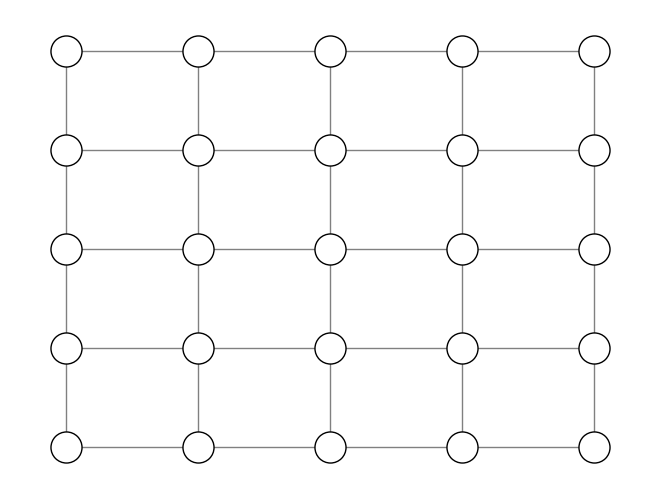

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.grid_2d_graph(5, 5)

pos = {(x, y): (x, y) for x, y in G.nodes()}

nx.draw(G, pos, with_labels=False, node_size=500, node_color='white', edgecolors='black', linewidths=1, edge_color='gray')
plt.show()


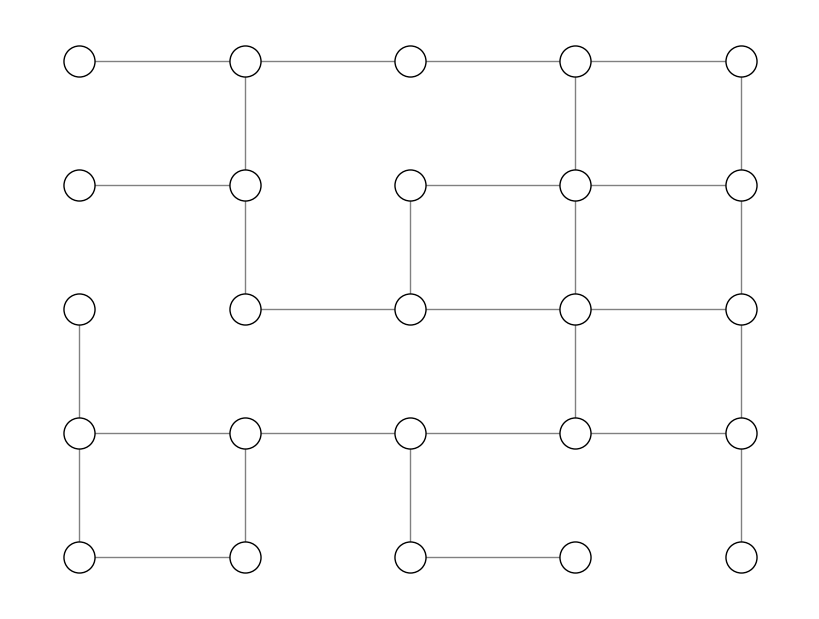

In [19]:
import networkx as nx
import matplotlib.pyplot as plt
import random

def generate_removable_edges(G):
    all_edges = list(G.edges())
    
    random.shuffle(all_edges)
    
    return all_edges

def remove_edges_while_connected(G, edges_to_remove, max_edges_to_remove):
    G_copy = G.copy()
    
    removed_edges = []
    
    for edge in edges_to_remove:
        if len(removed_edges) >= max_edges_to_remove:
            break
        
        G_copy.remove_edge(*edge)
        
        if not nx.is_connected(G_copy):
            G_copy.add_edge(*edge)
        else:
            removed_edges.append(edge)
    
    return removed_edges, G_copy

def visualize_graph(G_removed):
    pos = {(x, y): (x, y) for x, y in G_removed.nodes()}
    
    plt.figure(figsize=(8, 6))
    
    nx.draw(G_removed, pos, with_labels=False, node_size=500, node_color='white', edgecolors='black', linewidths=1, edge_color='gray')
    
    plt.show()

# graph size
G = nx.grid_2d_graph(5, 5)

# number of edges to remove
max_edges_to_remove = 10

edges_to_remove = generate_removable_edges(G)

removed_edges, G_removed = remove_edges_while_connected(G, edges_to_remove, max_edges_to_remove)

visualize_graph(G_removed)